$$ \frac{dx}{dt} = \alpha x - \beta x y $$
$$ \frac{dy}{dt} = -\gamma y + \delta y x $$

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.integrate import odeint
from IPython.html.widgets import interact

/home/santy/anaconda3/lib/python3.8/site-packages/IPython/html.py:12: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  warn("The `IPython.html` package has been deprecated since IPython 4.0. "


In [2]:
def solucion_temporal_interact(a, b, c, d, x0, y0, tf):
    
    conds_iniciales = np.array([x0, y0])

    # Condiciones para integración
    N = 800
    t = np.linspace(0, tf, N)
    
    solucion = odeint(df_dt, conds_iniciales, t, args=(a, b, c, d))
    
    plt.figure("Evolución temporal", figsize=(8,5))
    plt.title("Evolución temporal")
    plt.plot(t, solucion[:, 0], label='presa')
    plt.plot(t, solucion[:, 1], label='depredador')
    plt.xlabel('tiempo')
    plt.ylabel('población')
    plt.legend()

In [3]:
def df_dt(x, t, a, b, c, d):
    
    dx = a * x[0] - b * x[0] * x[1]
    dy = - c * x[1] + d * x[0] * x[1]
    return np.array([dx, dy])

In [4]:
def C(x, y, a, b, c, d):
    return a * np.log(y) - b * y + c * np.log(x) - d * x

Parametros 

In [5]:
a = 0.1   #representa la tasa de crecimiento de las presas (Ballena tiburón),
b = 0.02  #Representa la eficiencia de caza del depredador(Barcos Pesqueros)
c = 0.3   #representa la cantidad de barcos que regresan a puerto
d = 0.01  #Representa la tasa de crecimiento de los barcos pesqueros.

Condiciones iniciales

In [6]:
x0 =  80 # Presas
y0 = 9   # Depredadores
conds_iniciales = np.array([x0, y0])

Condiciones para integración

In [7]:
tf = 200
N = 800
t = np.linspace(0, tf, N)

In [8]:
solucion_logistic = odeint(df_dt, conds_iniciales, t, args=(a, b, c, d))

In [9]:
interact(solucion_temporal_interact,
         a=(0.01,0.5), b=(0.01,0.5),
         c=(0.01,0.5), d=(0.01,0.5),
         x0=(1,80), y0=(1,50),
         tf=(50,300));

interactive(children=(FloatSlider(value=0.255, description='a', max=0.5, min=0.01), FloatSlider(value=0.255, d…

<ipython-input-10-14608cbd8ff0>:11: RuntimeWarning: invalid value encountered in true_divide
  uu = uu / norm
<ipython-input-10-14608cbd8ff0>:12: RuntimeWarning: invalid value encountered in true_divide
  vv = vv / norm


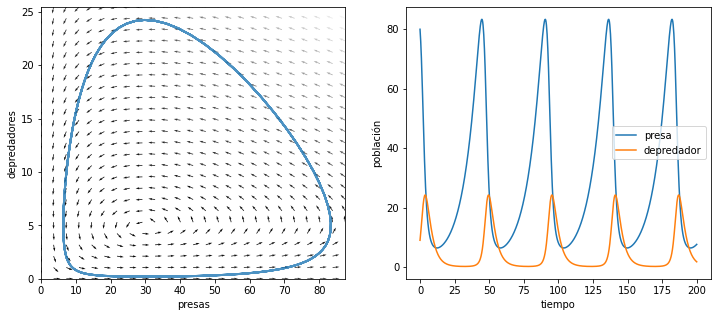

In [10]:
n_max = np.max(solucion_logistic) * 1.10
fig, ax = plt.subplots(1,2)
fig.set_size_inches(12,5)
x_max = np.max(solucion_logistic[:,0]) * 1.05
y_max = np.max(solucion_logistic[:,1]) * 1.05
x = np.linspace(0, x_max, 25)
y = np.linspace(0, y_max, 25)
xx, yy = np.meshgrid(x, y)
uu, vv = df_dt((xx, yy), 0, a, b, c, d)
norm = np.sqrt(uu**2 + vv**2)
uu = uu / norm
vv = vv / norm
ax[0].quiver(xx, yy, uu, vv, norm, cmap=plt.cm.gray)
ax[0].plot(solucion_logistic[:, 0], solucion_logistic[:, 1], lw=2, alpha=0.8)
ax[0].set_xlim(0, x_max)
ax[0].set_ylim(0, y_max)
ax[0].set_xlabel('presas')
ax[0].set_ylabel('depredadores')

ax[1].plot(t, solucion_logistic[:, 0], label='presa')
ax[1].plot(t, solucion_logistic[:, 1], label='depredador')
ax[1].legend()
ax[1].set_xlabel('tiempo')
ax[1].set_ylabel('población')
plt.savefig('campo_direcciones_ev_temporal.png')